In [23]:
import pandas as pd

In [24]:
import pandas as pd
import numpy as np

data = {
    'Language': [
        'Assamese', 'Bengali', 'Bodo', 'Dogri', 'Gujarati', 'Hindi', 'Kannada',
        'Kashmiri', 'Konkani', 'Maithili', 'Malayalam', 'Manipuri', 'Marathi',
        'Nepali', 'Odia', 'Punjabi', 'Sanskrit', 'Santali', 'Sindhi', 'Tamil',
        'Telugu', 'Urdu'
    ],
    '1981 Growth (%)': [
        np.nan, 14.52, np.nan, 17.82, 27.83, 27.12, 18.36,
        27.31, 4.09, 22.71, 17.15, 13.86, 18.41,
        -4.17, 15.90, 39.00, 176.04, 14.41, 21.92, np.nan,
        13.11, 22.08
    ],
    '1991 Growth (%)': [
        np.nan, 35.67, np.nan, np.nan, 23.08, 27.84, 27.46,
        np.nan, 12.13, 3.25, 18.20, 40.91, 26.35,
        52.62, 21.89, 19.21, 714.54, 20.40, 3.84, np.nan,
        30.41, 24.23
    ],
    '2001 Growth (%)': [
        0.68, 19.79, 10.52, np.nan, 13.26, 28.09, 15.05,
        np.nan, 41.37, 56.81, 8.85, 15.47, 15.13,
        38.29, 17.66, 24.48, -71.58, 24.03, 19.44, 14.69,
        12.10, 18.73
    ],
    '2011 Growth (%)': [
        16.27, 16.63, 9.81, 13.76, 20.40, 25.19, 15.99,
        22.97, -9.34, 11.53, 5.36, 20.07, 15.42,
        1.89, 13.64, 13.82, 75.60, 13.89, 9.34, 13.54,
        9.63, -1.48
    ]
}

df = pd.DataFrame(data)
print(df)


     Language  1981 Growth (%)  1991 Growth (%)  2001 Growth (%)  \
0    Assamese              NaN              NaN             0.68   
1     Bengali            14.52            35.67            19.79   
2        Bodo              NaN              NaN            10.52   
3       Dogri            17.82              NaN              NaN   
4    Gujarati            27.83            23.08            13.26   
5       Hindi            27.12            27.84            28.09   
6     Kannada            18.36            27.46            15.05   
7    Kashmiri            27.31              NaN              NaN   
8     Konkani             4.09            12.13            41.37   
9    Maithili            22.71             3.25            56.81   
10  Malayalam            17.15            18.20             8.85   
11   Manipuri            13.86            40.91            15.47   
12    Marathi            18.41            26.35            15.13   
13     Nepali            -4.17            52.62 

In [26]:
df = df.fillna(0)

In [35]:
df

,Language,1981 Growth (%),1991 Growth (%),2001 Growth (%),2011 Growth (%)
0,Assamese,0.00,0.00,0.68,16.27
1,Bengali,14.52,35.67,19.79,16.63
2,Bodo,0.00,0.00,10.52,9.81
3,Dogri,17.82,0.00,0.00,13.76
4,Gujarati,27.83,23.08,13.26,20.40
5,Hindi,27.12,27.84,28.09,25.19
6,Kannada,18.36,27.46,15.05,15.99
7,Kashmiri,27.31,0.00,0.00,22.97
8,Konkani,4.09,12.13,41.37,-9.34
9,Maithili,22.71,3.25,56.81,11.53


In [30]:
df = df[df.Language!= "Sanskrit"]

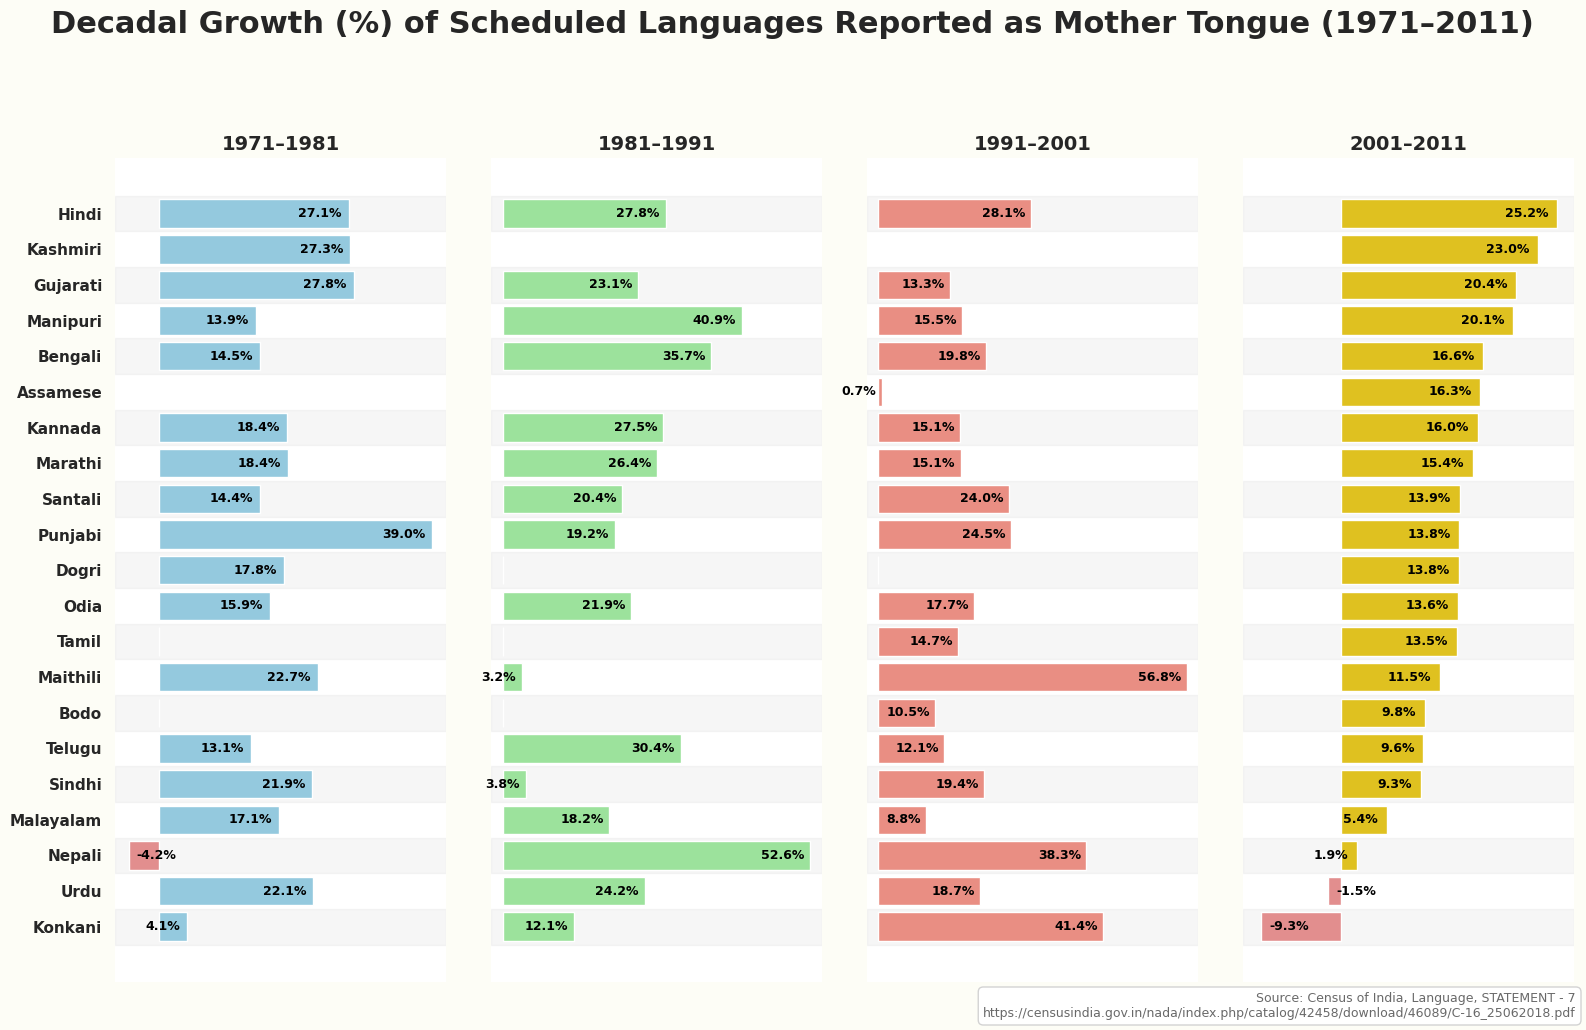

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import FancyBboxPatch
from matplotlib import rcParams

# Set Seaborn theme and font
sns.set(style="white")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Define decade titles and colors
growth_columns = {
    '1981 Growth (%)': '1971–1981',
    '1991 Growth (%)': '1981–1991',
    '2001 Growth (%)': '1991–2001',
    '2011 Growth (%)': '2001–2011'
}
base_colors = {
    '1981 Growth (%)': 'skyblue',
    '1991 Growth (%)': 'lightgreen',
    '2001 Growth (%)': 'salmon',
    '2011 Growth (%)': 'gold'
}
negative_color = 'lightcoral'

def plot_language_growth(df):
    fig, axes = plt.subplots(1, 4, figsize=(16, 10), sharey=True)
    fig.patch.set_facecolor('#fdfdf6')  # Light background
    fig.suptitle('Decadal Growth (%) of Scheduled Languages Reported as Mother Tongue (1971–2011)',
                 fontsize=22, fontweight='bold', y=1.02)

    # Sort all decades by the last decade (2011)
    df_sorted_final = df.dropna(subset=['2011 Growth (%)']).sort_values('2011 Growth (%)', ascending=False)
    language_order = df_sorted_final['Language'].tolist()

    for idx, (col, title) in enumerate(growth_columns.items()):
        df_this = df.set_index('Language').loc[language_order].reset_index()
        df_this = df_this.dropna(subset=[col])

        # Set color by decade, and use red for negatives
        bar_colors = [negative_color if val < 0 else base_colors[col] for val in df_this[col]]

        sns.barplot(data=df_this, x=col, y='Language', ax=axes[idx], palette=bar_colors)

        axes[idx].set_title(title, fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('')

        max_val = df_this[col].max()
        min_val = df_this[col].min()
        pad = 2.0
        axes[idx].set_xlim(min(min_val - pad, -1), max(max_val + pad, 1))

        if idx == 0:
            axes[idx].set_ylabel('', fontweight='bold')
        else:
            axes[idx].set_ylabel('')

        # Alternate row shading
        for i in range(0, len(df_this), 2):
            axes[idx].axhspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.2, zorder=0)

        # Remove spines
        for spine in axes[idx].spines.values():
            spine.set_visible(False)

        # Bold y-tick labels
        for label in axes[idx].get_yticklabels():
            label.set_fontweight('bold')

        # Add text labels to bars
        for i, p in enumerate(axes[idx].patches[:len(df_this)]):
            width = p.get_width()
            if width is None or width == 0:
                continue
            y = p.get_y() + p.get_height() / 2
            x = width - 1.0 if width > 0 else width + 1.0
            ha = 'right' if width > 0 else 'left'

            axes[idx].text(
                x, y, f'{width:.1f}%',
                va='center', ha=ha,
                fontweight='bold', fontsize=9, color='black'
            )

        axes[idx].set_xticks([])

    # Add source box
    source_text = ("Source: Census of India, Language, STATEMENT - 7\n"
                   "https://censusindia.gov.in/nada/index.php/catalog/42458/download/46089/C-16_25062018.pdf")
    fig.text(0.99, 0.01, source_text, fontsize=9, ha='right', va='bottom', color='dimgray',
             bbox=dict(facecolor='white', edgecolor='lightgray', boxstyle='round,pad=0.4'))

    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.savefig("language_growth1.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())

    plt.show()


# Example usage:
# df = pd.read_csv("your_data.csv")
plot_language_growth(df)


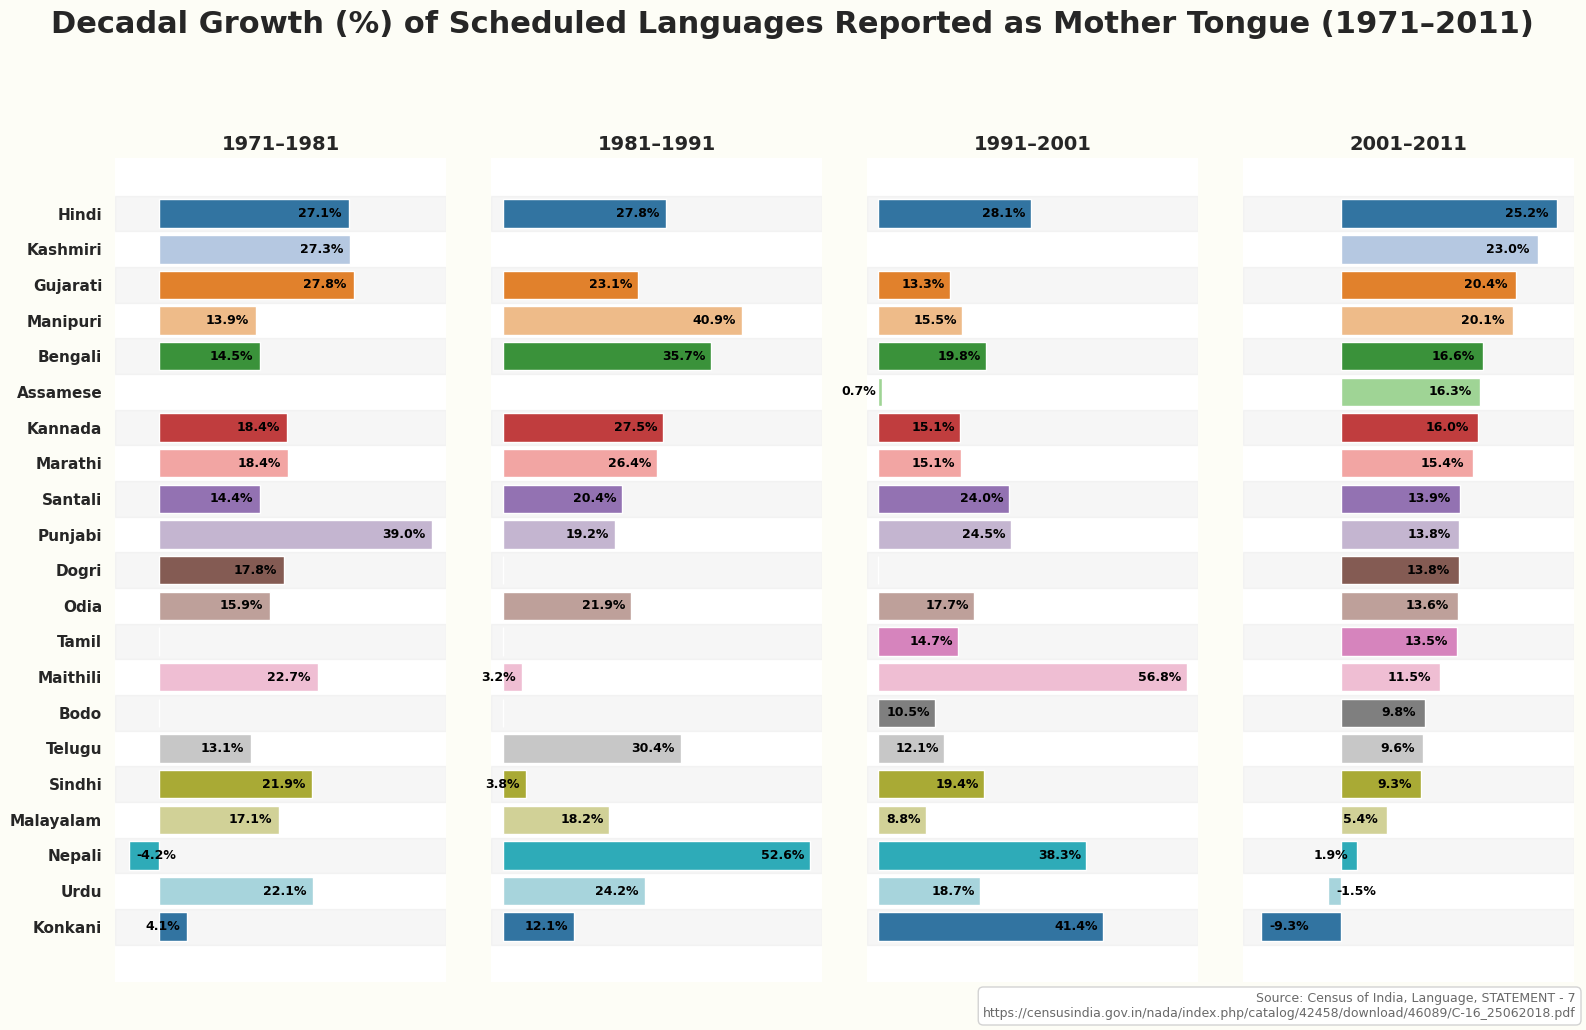

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import FancyBboxPatch
from matplotlib import rcParams

# Set Seaborn theme and font
sns.set(style="white")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Language growth columns
growth_columns = {
    '1981 Growth (%)': '1971–1981',
    '1991 Growth (%)': '1981–1991',
    '2001 Growth (%)': '1991–2001',
    '2011 Growth (%)': '2001–2011'
}

def plot_language_growth(df):
    fig, axes = plt.subplots(1, 4, figsize=(16, 10), sharey=True)
    fig.patch.set_facecolor('#fdfdf6')  # Light background
    fig.suptitle('Decadal Growth (%) of Scheduled Languages Reported as Mother Tongue (1971–2011)',
                 fontsize=22, fontweight='bold', y=1.02)

    # Determine language order by sorting on the 2011 Growth (%)
    df_sorted_final = df.dropna(subset=['2011 Growth (%)']).sort_values('2011 Growth (%)', ascending=False)
    language_order = df_sorted_final['Language'].tolist()

    # Assign unique colors per language
    lang_palette = sns.color_palette("tab20", len(language_order))
    lang_color_map = {lang: color for lang, color in zip(language_order, lang_palette)}

    for idx, (col, title) in enumerate(growth_columns.items()):
        # Reindex according to the final sorted language order
        df_this = df.set_index('Language').loc[language_order].reset_index()
        df_this = df_this.dropna(subset=[col])

        # Get bar colors based on language
        bar_colors = [lang_color_map[lang] for lang in df_this['Language']]

        sns.barplot(data=df_this, x=col, y='Language', ax=axes[idx], palette=bar_colors)

        axes[idx].set_title(title, fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('')

        max_val = df_this[col].max()
        min_val = df_this[col].min()
        pad = 2.0
        axes[idx].set_xlim(min(min_val - pad, -1), max(max_val + pad, 1))

        if idx == 0:
            axes[idx].set_ylabel('', fontweight='bold')
        else:
            axes[idx].set_ylabel('')

        # Alternate row color
        for i in range(0, len(df_this), 2):
            axes[idx].axhspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.2, zorder=0)

        # Remove spines
        for spine in axes[idx].spines.values():
            spine.set_visible(False)

        # Bold y-tick labels
        for label in axes[idx].get_yticklabels():
            label.set_fontweight('bold')

        # Add text labels to bars
        for i, p in enumerate(axes[idx].patches[:len(df_this)]):
            width = p.get_width()
            if width is None or width == 0:
                continue
            y = p.get_y() + p.get_height() / 2
            x = width - 1.0 if width > 0 else width + 1.0
            ha = 'right' if width > 0 else 'left'

            axes[idx].text(
                x, y, f'{width:.1f}%',
                va='center', ha=ha,
                fontweight='bold', fontsize=9, color='black'
            )

        axes[idx].set_xticks([])

    # Add source box at bottom-right
    source_text = ("Source: Census of India, Language, STATEMENT - 7\n"
                   "https://censusindia.gov.in/nada/index.php/catalog/42458/download/46089/C-16_25062018.pdf")
    fig.text(0.99, 0.01, source_text, fontsize=9, ha='right', va='bottom', color='dimgray',
             bbox=dict(facecolor='white', edgecolor='lightgray', boxstyle='round,pad=0.4'))

    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.savefig("language_growth2.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())

    plt.show()

# Example usage:
# df = pd.read_csv("your_data.csv")
plot_language_growth(df)
